# Overfitting
Simulate a data generating process like in Lab2 with only 2 variables X and Y, for $n$ = 1000. For practical purposes, make the intercept parameter of your data generating process be equal to zero. You are asked to do the following in a loop:

*   Estimate a linear model with just one feature $x1$ = $x$
*   Estimate a linear model with two features $x1$ = $x$ and $x2$ = $x^{2}$
*   Repeat the same process for the following number of features
    *   1, 2, 5, 10, 20, 50, 100, 200, 500, 1000

In each iteration you should keep the R-squared, adjusted R-squared, and the out-of-sample R-squared. Only for the out-of-sample R-squared you'll need to split the data into 75% training and 25% testing.

(1 point - Variable generation and adecuate loop)
(1 point - Estimation on full sample)
(2 points - Estimation on train/test split)
(1 points - R-squared computation and storage)

Finally, in three separate graphs you should plot the respective R-squared in the y-axis, and the number of features in the x-axis. Comment your results and provide intuition.

(3 points - One for each graph; keep in mind titles and axis ranges and labels)

In [ ]:
# Importar librerías
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sms
from sklearn.model_selection import train_test_split

In [ ]:
# Generación de datos
x = np.random.uniform(0, 1, 1000)

# Ruido
e = np.random.normal(0, 1, 1000)

# Variable dependiente
y = x + e

In [ ]:
# Número de features
features_range = [1, 2, 5, 10, 20, 50, 100, 200, 500, 1000]

# Listas para resultados
r2_list = []
adj_r2_list = []
oos_r2_list = []

In [ ]:
# Bucle
for p in features_range:
    # Crear matriz
    X_design = np.column_stack([x**i for i in range(1, p+1)])

    # Estimación en muestra completa
    model = LinearRegression(fit_intercept=False)
    model.fit(X_design, y)
    y_pred_full = model.predict(X_design)

    # Calcular R²
    ss_res = np.sum((y - y_pred_full) ** 2)
    ss_tot = np.sum((y - np.mean(y)) ** 2)
    R_sq = 1 - (ss_res / ss_tot)
    r2_list.append(R_sq)

    # Calcular adjusted R²
    n = len(y)
    k = p
    if n > k + 1:
        adjR_sq = 1 - ((1 - R_sq) * (n - 1) / (n - k - 1))
    else:
        adjR_sq = np.nan
    adj_r2_list.append(adjR_sq)

    # Train/test split
    X_train, X_test, y_train, y_test = train_test_split(X_design, y, test_size=0.25)

    model_sklearn = LinearRegression(fit_intercept=False)
    model_sklearn.fit(X_train, y_train)

    # Calcular out-of-sample R²
    y_pred_test = model_sklearn.predict(X_test)
    ss_res_test = np.sum((y_test - y_pred_test) ** 2)
    ss_tot_test = np.sum((y_test - np.mean(y_test)) ** 2)

    if ss_tot_test > 0:
        oos_r2 = 1 - (ss_res_test / ss_tot_test)
    else:
        oos_r2 = np.nan
    oos_r2_list.append(oos_r2)

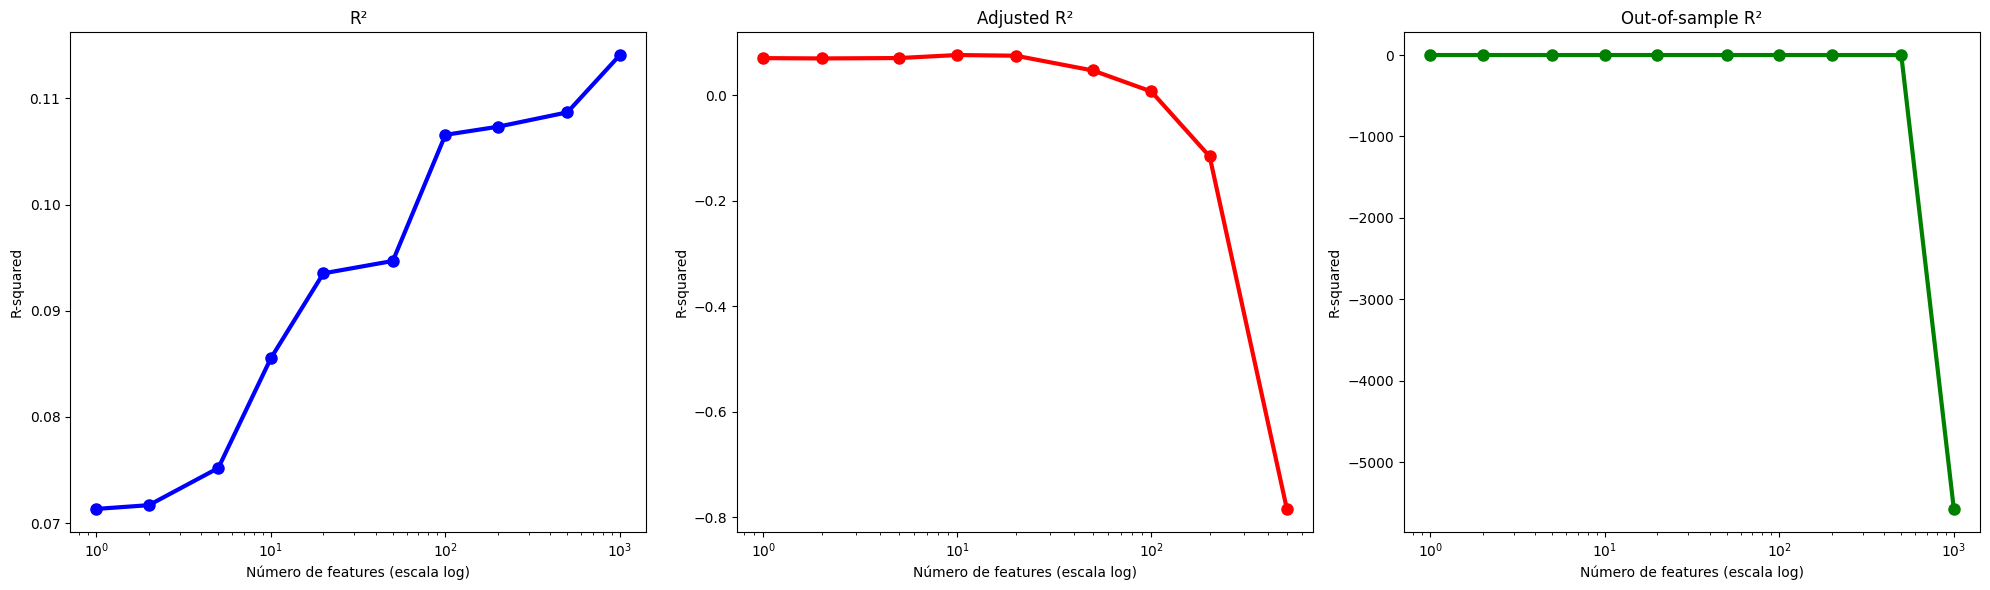

In [ ]:
# Gráficos
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Gráfico 1: R-squared
axes[0].semilogx(features_range, r2_list, 'bo-', linewidth=3, markersize=8)
axes[0].set_xlabel('Número de features (escala log)')
axes[0].set_ylabel('R-squared')
axes[0].set_title('R²')

# Gráfico 2: Adjusted R-squared
axes[1].semilogx(features_range, adj_r2_list, 'ro-', linewidth=3, markersize=8)
axes[1].set_xlabel('Número de features (escala log)')
axes[1].set_ylabel('R-squared')
axes[1].set_title('Adjusted R²')

# Gráfico 3: Out-of-sample R-squared
axes[2].semilogx(features_range, oos_r2_list, 'go-', linewidth=3, markersize=8)
axes[2].set_xlabel('Número de features (escala log)')
axes[2].set_ylabel('R-squared')
axes[2].set_title('Out-of-sample R²')

plt.tight_layout()
plt.show()

# Intuición

**R-squared**
*   Aumenta monotónicamente con más features.
*   Más features → Mejor ajuste a datos de entrenamiento.
*   Con muchas feaures el modelo memoriza ruido del conjunto de entrenamiento.
*   Por ello, puede ser engañoso ya que un valor alto no garantiza que el modelo generalice bien.

**Adjusted R-squared**
*   Inicialmente se mantiene estable cuando captura señal real.
*   Luego, decrece cuando las features adicionales solo aportan ruido.
*   Penaliza el exceso de features.

**Out-of-sample R-squared**
*   Disminuye después de cierto punto porque el modelo memoriza patrones específicos del entrenamiento que no existen en datos nuevos.